## Iterator (ang. Iterator, Cursor)

**Typ**: behawioralny \
**Zakres**: obiektowy

<div style="border: solid 1px;padding: 20px;text-align: center">
    Wzorzec <b>iterator</b> zapewnia sposób na sekwencyjny dostęp do elementów agregatu bez ujawniania jego wewnętrznej reprezentacji.
</div>

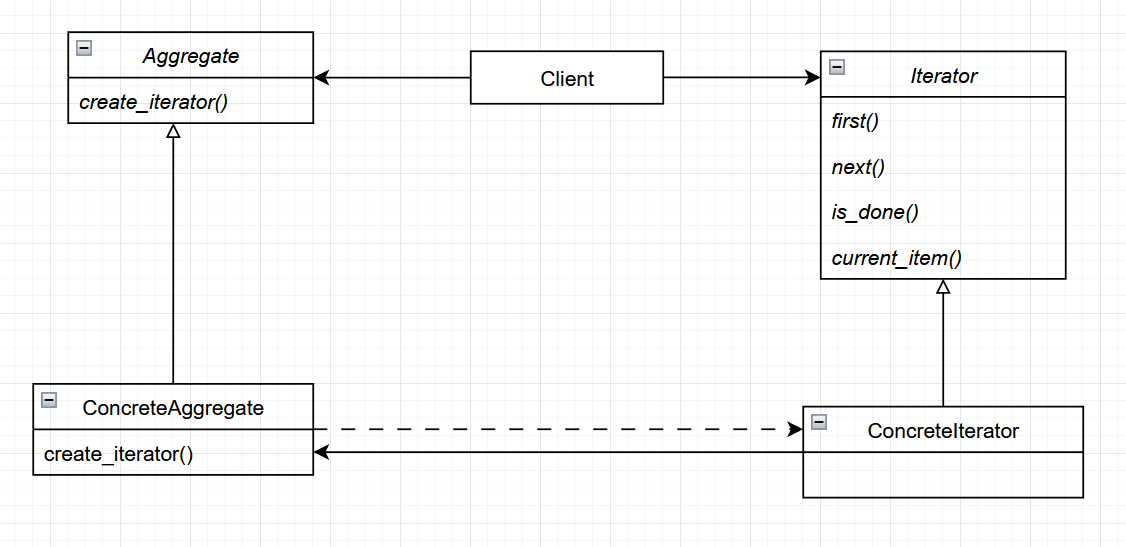

### Problem - dostęp do kolekcji bez ujawniania struktury

Masz kolekcję książek. Klient chce przejść przez wszystkie książki.

**Jak to zrobić bez:**
- Ujawniania struktury wewnętrznej (lista? drzewo? hash?)
- Zaśmiecania kolekcji logiką iteracji
- Ograniczania do jednego sposobu iteracji

### Naiwne podejście - bezpośredni dostęp do struktury

In [ ]:
class BookCollection:
    def __init__(self):
        self.books = []  # ❌ Struktura wewnętrzna ujawniona!
    
    def add(self, book):
        self.books.append(book)

In [ ]:
collection = BookCollection()
collection.add("Python 101")
collection.add("Design Patterns")
collection.add("Clean Code")

# Klient musi znać strukturę wewnętrzną!
for book in collection.books:  # ❌ Bezpośredni dostęp do `books`
    print(book)

**Problemy:**
- ❌ Klient **zna strukturę** (`books` to lista)
- ❌ Co jeśli zmienisz `list` na `dict` albo drzewo? **Klient się zepsuje**!
- ❌ Nie możesz mieć **wielu iteracji** jednocześnie
- ❌ **Brak hermetyzacji** - klient może modyfikować `books` bezpośrednio

### Rozwiązanie - wzorzec Iterator (klasyczny)

**Idea:** Osobny obiekt **Iterator** odpowiada za przechodzenie przez kolekcję.

### Krok 1: Interfejs Iterator

In [ ]:
from abc import ABC, abstractmethod

class Iterator(ABC):
    """Interfejs iteratora"""
    
    @abstractmethod
    def has_next(self) -> bool:
        """Czy są jeszcze elementy?"""
        pass
    
    @abstractmethod
    def next(self):
        """Zwróć następny element"""
        pass

### Krok 2: Konkretny Iterator

In [ ]:
class BookIterator(Iterator):
    """Iterator dla kolekcji książek"""
    
    def __init__(self, books):
        self._books = books  # Dostęp do kolekcji
        self._index = 0      # Aktualny indeks
    
    def has_next(self) -> bool:
        return self._index < len(self._books)
    
    def next(self):
        if not self.has_next():
            raise StopIteration("Koniec kolekcji")
        
        book = self._books[self._index]
        self._index += 1
        return book

### Krok 3: Agregat (kolekcja) zwracający Iterator

In [ ]:
class BookCollection:
    """Kolekcja książek - ukrywa strukturę wewnętrzną"""
    
    def __init__(self):
        self._books = []  # ✅ Prywatne - klient nie ma dostępu!
    
    def add(self, book):
        self._books.append(book)
    
    def create_iterator(self) -> Iterator:
        """Tworzy iterator dla tej kolekcji"""
        return BookIterator(self._books)

**Kluczowa zmiana:**
- Kolekcja **NIE ujawnia** `_books`
- Zamiast tego zwraca **Iterator**
- Klient używa `has_next()` i `next()` - **nie zna struktury**!

### Krok 4: Użycie - bez znajomości struktury

In [ ]:
collection = BookCollection()
collection.add("Python 101")
collection.add("Design Patterns")
collection.add("Clean Code")

# ✅ Klient NIE zna struktury wewnętrznej
iterator = collection.create_iterator()

while iterator.has_next():
    book = iterator.next()
    print(book)

**Zalety:**
- ✅ **Hermetyzacja** - struktura ukryta
- ✅ **Możesz zmienić** `list` na `dict` - klient nie zauważy
- ✅ **Wiele iteracji** jednocześnie (każdy iterator niezależny)
- ✅ **Oddzielenie odpowiedzialności** - kolekcja vs iteracja

## Wiele iteracji jednocześnie

In [ ]:
collection = BookCollection()
collection.add("Book A")
collection.add("Book B")
collection.add("Book C")

# Dwa niezależne iteratory!
iter1 = collection.create_iterator()
iter2 = collection.create_iterator()

print("Iter1:", iter1.next())  # Book A
print("Iter2:", iter2.next())  # Book A
print("Iter1:", iter1.next())  # Book B
print("Iter2:", iter2.next())  # Book B

# Każdy iterator ma swój własny indeks!

## Struktura wzorca (klasyczna)

**Elementy wzorca Iterator:**

1. **Iterator** - `Iterator`
   - Interfejs dla iteratorów
   - Metody: `has_next()`, `next()`

2. **ConcreteIterator** - `BookIterator`
   - Konkretny iterator
   - Przechowuje aktualną pozycję
   - Wie jak przejść przez kolekcję

3. **Aggregate** - interfejs kolekcji
   - Deklaruje `create_iterator()`

4. **ConcreteAggregate** - `BookCollection`
   - Konkretna kolekcja
   - Tworzy konkretny iterator

## Kiedy używać wzorca Iterator?

Wzorzec Iterator stosuj gdy:

1. **Chcesz ukryć strukturę wewnętrzną kolekcji**
   - Klient nie powinien znać czy to lista, drzewo czy hash

2. **Potrzebujesz wielu sposobów iteracji**
   - Od początku, od końca, co drugi element

3. **Chcesz jednolity interfejs dla różnych kolekcji**
   - Lista, drzewo, graf - ten sam sposób iteracji

4. **Potrzebujesz wielu niezależnych iteracji jednocześnie**
   - Każdy iterator ma swoją pozycję

**Przykłady praktyczne:**
- Kolekcje niestandardowe (drzewo, graf)
- Lazy loading (elementy ładowane w locie)
- Strumienie danych (pliki, sieć)
- Range, enumerate, zip w Pythonie

## Podsumowanie

Wzorzec Iterator:
- ✅ **Ukrywa strukturę** kolekcji
- ✅ **Jednolity interfejs** do przechodzenia kolekcji
- ✅ **Wiele iteracji** jednocześnie (niezależne iteratory)
- ✅ **Różne sposoby** iteracji (forward, reverse, filtrowanie)
- ✅ **Separacja odpowiedzialności** - kolekcja vs iteracja
- ⚠️ **Overkill** dla prostych list (w Pythonie wystarczy `for item in list`)

**Kluczowa idea:**
> Dostęp sekwencyjny do kolekcji **bez ujawniania** jej struktury

**Klasyczna struktura:**
- **Iterator** - interfejs (`has_next()`, `next()`)
- **ConcreteIterator** - konkretny iterator (przechowuje indeks)
- **Aggregate** - kolekcja (`create_iterator()`)

**Istota wzorca:**
- **Hermetyzacja:** Klient nie zna struktury (`_books` ukryte)
- **Niezależność:** Każdy iterator ma swój stan (indeks)
- **Polimorfizm:** Ten sam interfejs dla różnych kolekcji